# ¡Hola  !🙋🏻‍♂️

Te escribe Lisandro Saez, soy revisor de código en Tripleten y tengo el agrado de revisar el proyecto que entregaste.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberías hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma (no te preocupes, no es obligatorio):

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola, muchas gracias por tus comentarios y la revisión.
</div>

¡Empecemos!

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt# importar librerías

In [9]:
# leer conjuntos de datos en los DataFrames
df_instacart_orders=pd.read_csv('datasets/instacart_orders.csv',sep=';')
df_products=pd.read_csv('datasets/products.csv',sep=';')
df_aisles=pd.read_csv('datasets/aisles.csv',sep=';')
df_departments=pd.read_csv('datasets/departments.csv',sep=';')
df_order_products=pd.read_csv('datasets/order_products.csv',sep=';')

In [11]:
# mostrar información del DataFrame
df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [12]:
df_instacart_orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [13]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [14]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [15]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [16]:
# mostrar información del DataFrame
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
Los dataframes: instacard_orders tiene datos ausentes en la columna day_since_prior_order, products en la columna product_name tiene datos ausentes.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
Luego de identificado la cantidad de valores de cada dataframe y en vista que hay valores ausentes en algunas columnas se tendria que completar esos valores con el metodo fillna()
Para identificar la cantidad de  los valores de cada dataframe se va usar el metodo duplicated().sum()
y para eliminar los valores duplicados se debe utilizar el metodo drop_duplicates()
Los valores ausentes en el caso de la columna de dias transcurridos puede ser debido a que algunas compras fueron efectuadas el mismo dia y aun no hayan transcurrido dias.
Los valores ausentes en el caso de la comlumna product_name puede ser debido a un error humano y no se especifico el nombre del producto. 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [23]:
# Revisa si hay pedidos duplicados
df_instacart_orders[df_instacart_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [25]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_filtered=df_instacart_orders[(df_instacart_orders['order_dow']==3) & (df_instacart_orders['order_hour_of_day']==2)]
df_filtered

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado? Que estan ordenes duplicadas el dia miercoles a las 2 am

In [28]:
# Elimina los pedidos duplicados
df_instacart_orders=df_instacart_orders.drop_duplicates().reset_index(drop=True)

In [29]:
# Vuelve a verificar si hay filas duplicadas
df_instacart_orders.duplicated().sum()

0

In [30]:
# Vuelve a verificar si hay duplicadasen la columna order_id
df_instacart_orders.duplicated(subset='order_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos
En el Dataframe de Instacard_orders hay 15 valores duplicados los cuales se aplica el metodo drop.duplicates() para eliminarlos y se volvio a verificar en la columna del order_id si hay algun duplicado.

### `products` data frame

In [34]:
# Verifica si hay filas totalmente duplicadas
df_products[df_products.duplicated()]

,product_id,product_name,aisle_id,department_id


In [35]:
# Verifica si hay IDs duplicadas de productos
df_products.duplicated(subset='product_id').sum()

0

In [36]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products.duplicated(subset='product_name').sum()

1257

In [37]:
df_products[(df_products['product_name'].str.upper().duplicated()) &(~df_products['product_name'].isna())]

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [38]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products[(df_products.duplicated(subset='product_name')) & ~df_products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id


Describe brevemente tus hallazgos y lo que hiciste con ellos.
En el dataframe de products se identifico los duplicados en caso de las filas no hay duplicadas ni el caso del ID del producto lo que si hay duplicados es en el nombre de los productos faltante. Los duplicados tienen id diferentes por lo que no se puede borrar.

### `departments` data frame

In [41]:
# Revisa si hay filas totalmente duplicadas
df_departments[df_departments.duplicated()]

,department_id,department


In [42]:
# Revisa si hay IDs duplicadas de productos
df_departments.duplicated(subset='department_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos. No hay ningun valor duplicado en el Dataframe departments

### `aisles` data frame

In [45]:
# Revisa si hay filas totalmente duplicadas
df_aisles[df_aisles.duplicated()]

,aisle_id,aisle


In [46]:
# Revisa si hay IDs duplicadas de productos
df_aisles[df_aisles.duplicated(subset='aisle_id')]

,aisle_id,aisle


Describe brevemente tus hallazgos y lo que hiciste con ellos. Se utilizo el metodo duplicated()para identidicar si hay valores duplicados y el resultado fue 0.


### `order_products` data frame

In [49]:
# Revisa si hay filas totalmente duplicadas
df_order_products[df_order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [50]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_order_products[df_order_products.duplicated(subset='order_id')]

,order_id,product_id,add_to_cart_order,reordered
367,2867619,48094,9.0,0
824,844425,39408,10.0,1
1124,3319857,37067,19.0,0
1258,1038788,12471,14.0,0
1303,2825714,44632,16.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


Describe brevemente tus hallazgos y lo que hiciste con ellos. Se volvio a utilizar el metodo duplicated(),en caso de los  duplicados en la columna 'order_id' que es la forma unica de orden es posible que se dupliquen pq en la misma orden se agragaron varios productos por lo que no seria prudente eliminar. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [55]:
# Encuentra los valores ausentes en la columna 'product_name'
df_products['product_name'].isna().sum()

1258

Describe brevemente cuáles son tus hallazgos. Hay 1258 valores ausentes en la columna product name 48436

In [57]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_products[(df_products['product_name'].isna()) & (df_products['aisle_id']== 100)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos. Si estan relacionados los valores ausentes con el pasillo 100 porque sale en el total 1258 que es el total de valores ausentes de todo el dataframe.

In [59]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_products[(df_products['product_name'].isna()) & (df_products['department_id']== 21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.Si estan relacionados los valores ausentes con el departamento 100 porque sale en el total 1258 que es el total de valores ausentes de todo el dataframe.

In [61]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_products[(df_products['aisle_id']==100) & (df_products['department_id']== 21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos. Todos los datos del pasillo 100 y departamento 21 tienen valores ausentes.

In [63]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('unknown',inplace=True)

In [65]:
df_products[(df_products['aisle_id']==100) & (df_products['department_id']== 21)]

,product_id,product_name,aisle_id,department_id
37,38,unknown,100,21
71,72,unknown,100,21
109,110,unknown,100,21
296,297,unknown,100,21
416,417,unknown,100,21
...,...,...,...,...
49552,49553,unknown,100,21
49574,49575,unknown,100,21
49640,49641,unknown,100,21
49663,49664,unknown,100,21


Describe brevemente tus hallazgos y lo que hiciste con ellos. Los valores NaN (ausentes) del pasillo 100 del departamento 21 se rellenaron con el 'unknown' como nombre de producto desconocido.

### `orders` data frame

In [68]:
# Encuentra los valores ausentes
df_instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [69]:
df_instacart_orders['days_since_prior_order'].isna().sum()

28817

In [70]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_instacart_orders[(df_instacart_orders['days_since_prior_order'].isna()) & (~df_instacart_orders['order_number'] == 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos. No hay valores que sean ausentes que no tengan que ver con el primer pedido del cliente entonces como la columna son valores transcurridos luego de la primer orden y los valores asusentes son de las primeras ordenes porque logicmanete no hay transcurrido dias despues de la primera orden. Entonces se mantien los valores ausentes pq no habria ninguna inferencia en rellenarlos con 0 dias transcurridos y dejarlos como NaN. 

### `order_products` data frame

In [74]:
# Encuentra los valores ausentes
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [75]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
df_order_products['add_to_cart_order'].min(),df_order_products['add_to_cart_order'].max()

(1.0, 64.0)

Describe brevemente cuáles son tus hallazgos.

In [77]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ids_isna= df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()
ids_isna

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171],
      dtype=int64)

In [78]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
df_order_products[df_order_products['order_id'].isin(ids_isna)].groupby('order_id')['product_id'].count().sort_values()


order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

Describe brevemente cuáles son tus hallazgos.

In [80]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order']=df_order_products['add_to_cart_order'].fillna(999).astype('int')

In [81]:
df_order_products['add_to_cart_order'].isna().sum()

0

In [82]:
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int32
 3   reordered          4545007 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos. Los valores ausentes en la columna add_to_cart_order que superan los 64 articulos se completo con el valor 999 y el tipo de dato se convitio a entero.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
En la fase del procesamiento de datos se elimino lo duplicados de los dataframes asi como se relleno los datos ausentes de los dataframes con unkdown y 999. Para de esa forma tener limpio los datos para proceder al analisis de datos. 

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [90]:
df_instacart_orders['order_hour_of_day'].min(),df_instacart_orders['order_hour_of_day'].max()

(0, 23)

In [91]:
df_instacart_orders['order_dow'].min(),df_instacart_orders['order_dow'].max()

(0, 6)

Escribe aquí tus conclusiones Estan correctos las horas del dia ya que oscilan de 0 a 23 horas y de 0 a 6 completando los 7 dias de las semana.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [95]:
ordenes_por_hora_del_dia= df_instacart_orders['order_hour_of_day'].value_counts().sort_index()
ordenes_por_hora_del_dia

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: count, dtype: int64

<Axes: title={'center': 'Ordenes por hora del dia'}, xlabel='Hora del dia', ylabel='Cantidad de Ordenes'>

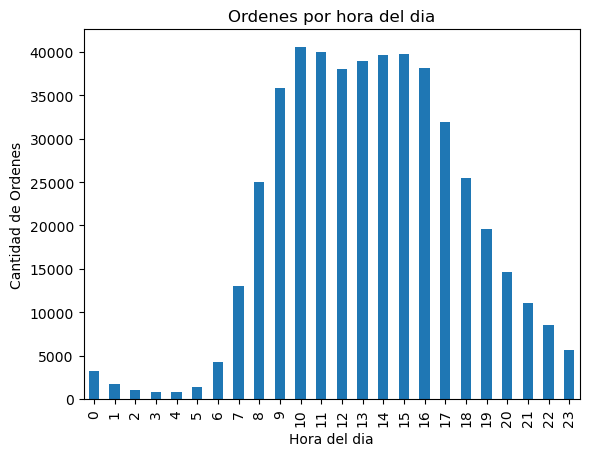

In [96]:
ordenes_por_hora_del_dia.plot(kind='bar',title='Ordenes por hora del dia',xlabel='Hora del dia',ylabel='Cantidad de Ordenes')

Conclusion: De 10 am a 16pm hay mas volumen de ordenes. De 17 pm hasta las 23 horas empiezan a decaer las compras posiblemente porque son horas cercanas a la noche y es posible que ya no haya muchos compradorees asi como en las madrugadas sino a apartir de las 7 am se activan las comrpas que comienza la hora de actividad.

### [A3] ¿Qué día de la semana compran víveres las personas?

In [99]:
ordenes_por_dia_de_la_semana= df_instacart_orders['order_dow'].value_counts().sort_index()
ordenes_por_dia_de_la_semana

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: count, dtype: int64

<Axes: title={'center': 'Ordenes por dia de la semana'}, xlabel='Dia de la semana', ylabel='Cantidad de Ordenes'>

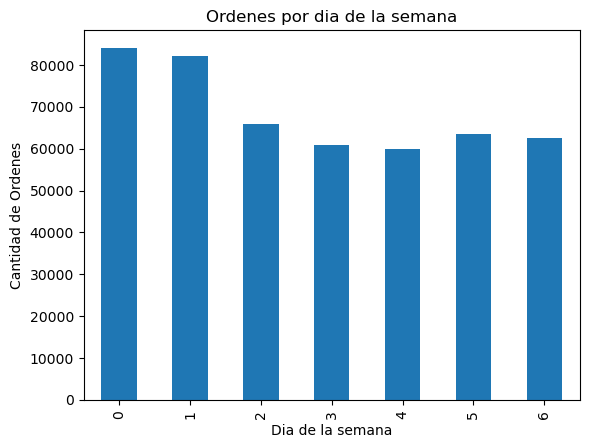

In [100]:
ordenes_por_dia_de_la_semana.plot(kind='bar',title='Ordenes por dia de la semana',xlabel='Dia de la semana',ylabel='Cantidad de Ordenes')

Conclsuion: El dia domingo y sabado son los dias de mas ordenes puede ser porque los fines de semana los usarios tienen mas tiempo de hacer compras y eso va disminuyendo de lunes a viernes, los miercoles y jueves son los dias de menos ordenes de toda la semana. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [103]:
tiempo_de_espera_para_ordenar_de_nuevo= df_instacart_orders['days_since_prior_order'].value_counts().sort_index()
tiempo_de_espera_para_ordenar_de_nuevo

days_since_prior_order
0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: count, dtype: int64

<Axes: title={'center': 'Tiempo de espera de los clientes para ordenar de nuevo'}, xlabel='Tiempo de espera', ylabel='Cantidad de Ordenes'>

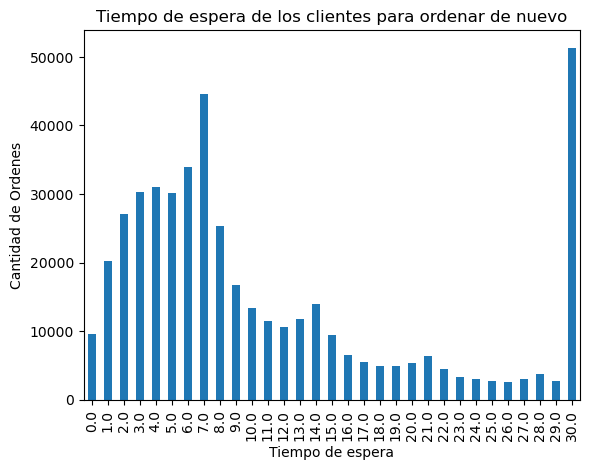

In [104]:
tiempo_de_espera_para_ordenar_de_nuevo.plot(kind='bar',title='Tiempo de espera de los clientes para ordenar de nuevo',xlabel='Tiempo de espera',ylabel='Cantidad de Ordenes')

Conclusiones: En la grafica se evidencia los valores maximos en el dia siete y treinta del mes por lo que se puede concluir que la tendencia de las personas es a comprar semanalmente o mensulamente que es posible porque al fin de mes la mayoria de personas tienen sus ingresos. 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [110]:
wednesday=df_instacart_orders[df_instacart_orders['order_dow']== 3]
saturday=df_instacart_orders[df_instacart_orders['order_dow']== 6]

In [111]:
wednesday= wednesday.groupby('order_hour_of_day')['order_id'].count()
wednesday

order_hour_of_day
0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_id, dtype: int64

In [112]:
saturday= saturday.groupby('order_hour_of_day')['order_id'].count()
saturday

order_hour_of_day
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_id, dtype: int64

In [113]:
concat_days=pd.concat([wednesday,saturday], axis=1).reset_index()
concat_days.columns=['hora_del_dia','wednesday','saturday']
concat_days

,hora_del_dia,wednesday,saturday
0,0,373,464
1,1,215,254
2,2,106,177
3,3,101,125
4,4,108,118
5,5,170,161
6,6,643,451
7,7,1732,1619
8,8,3125,3246
9,9,4490,4311


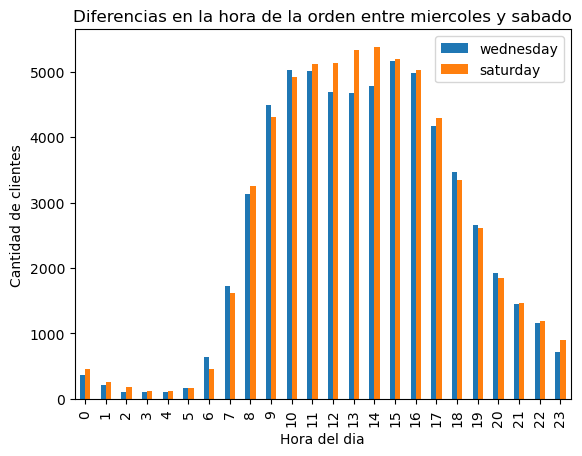

In [114]:
concat_days.plot(title='Diferencias en la hora de la orden entre miercoles y sabado', kind='bar',x='hora_del_dia',y= ['wednesday','saturday'],xlabel='Hora del dia',ylabel='Cantidad de clientes')
plt.legend(['wednesday','saturday'])
plt.show()

Escribe aquí tus conclusiones: El dia sabado de 11 a 17 tiene mas movimiento que el miercoles, pero el dia miercoles temprano de 6 a 7 hay mas movimiento seguramnte porque es un dia laboral y los fines de semana la tendencia es que se haga compras mas tarde. Y de 18 a 20 horas tiene mas movimiento porque es un dia entre semana que por lo general hay mas movimiento a diferencia de un dia sabado que es fin de semana. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [118]:
numero_pedido_por_cliente=df_instacart_orders.groupby('order_number')['user_id'].count().sort_values(ascending=False)
numero_pedido_por_cliente

order_number
1      28817
4      28703
3      28685
2      28633
5      25661
       ...  
97       221
96       220
100      194
98       191
99       169
Name: user_id, Length: 100, dtype: int64

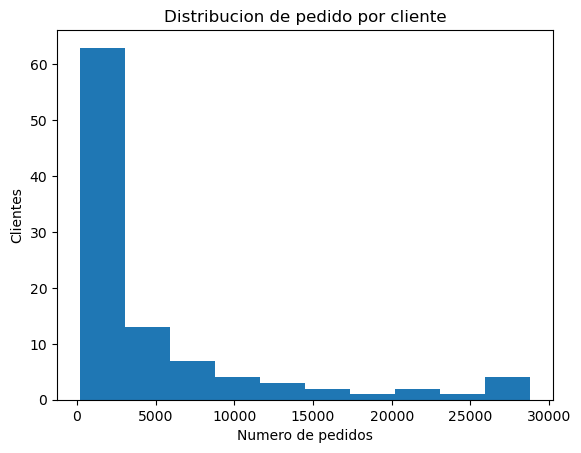

In [119]:
numero_pedido_por_cliente.plot(kind='hist',title='Distribucion de pedido por cliente',xlabel='Numero de pedidos',ylabel='Clientes')
plt.show()

Escribe aquí tus conclusiones Se puede evidenciar que la mayoria de veces que son pocos los clientes frecuentes.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [122]:
df_order_products=df_order_products.merge(df_products,on='product_id')
df_order_products                                       

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1
1,567889,1560,1,1,Bag Of Ice,37,1
2,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...,91,16
3,491251,8670,35,1,Diced Tomatoes,81,15
4,2571142,1940,5,1,Organic 2% Reduced Fat Milk,84,16
...,...,...,...,...,...,...,...
4545002,577211,15290,12,1,Orange Bell Pepper,83,4
4545003,1219554,21914,9,0,Peanut Butter & Jelly Fruit & Nut Food Bar,3,19
4545004,692640,47766,4,1,Organic Avocado,24,4
4545005,319435,691,8,1,Organic Promise Strawberry Fields Cereal,121,14


In [123]:
mejores_productos=df_order_products.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False)
mejores_productos

product_id  product_name                                          
24852       Banana                                                    66050
13176       Bag of Organic Bananas                                    53297
21137       Organic Strawberries                                      37039
21903       Organic Baby Spinach                                      33971
47209       Organic Hass Avocado                                      29773
                                                                      ...  
5836        Arctic D Cod Liver Oil Lemon                                  1
43573       Whisk- 10 Inch                                                1
43570       Queso Cotija                                                  1
36174       Whole Pinto Beans                                             1
41403       Extra Rich & Thick Spaghetti Sauce Spices & Seasonings        1
Name: order_id, Length: 45573, dtype: int64

In [124]:
veinte_mejores_productos=mejores_productos.head(20)
veinte_mejores_productos

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: order_id, dtype: int64

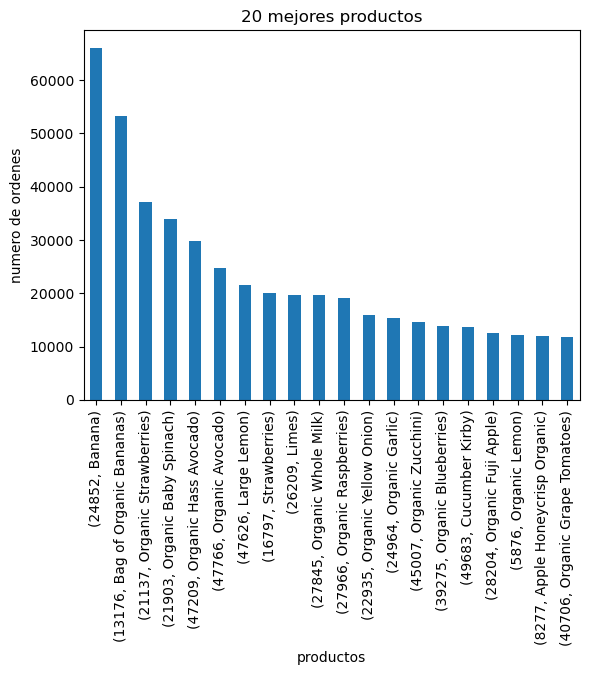

In [125]:
veinte_mejores_productos.plot(kind='bar',title='20 mejores productos',xlabel='productos',ylabel='numero de ordenes')
plt.show()

Escribe aquí tus conclusiones: Los 20 mejpres productos son organicos, se podria deducir que la tendencia del consumidor es comprar vegetales de origen organico. 

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [130]:
articulos_por_pedido=df_order_products.groupby('order_id')['product_id'].count().sort_index(ascending=False)

In [131]:
articulos_por_pedido

order_id
3421079     1
3421077     4
3421071     5
3421053     9
3421034    17
           ..
20          8
19          3
11          5
9          15
4          13
Name: product_id, Length: 450046, dtype: int64

<Axes: title={'center': 'Articulos por pedido'}, xlabel='Articulos', ylabel='Ordenes'>

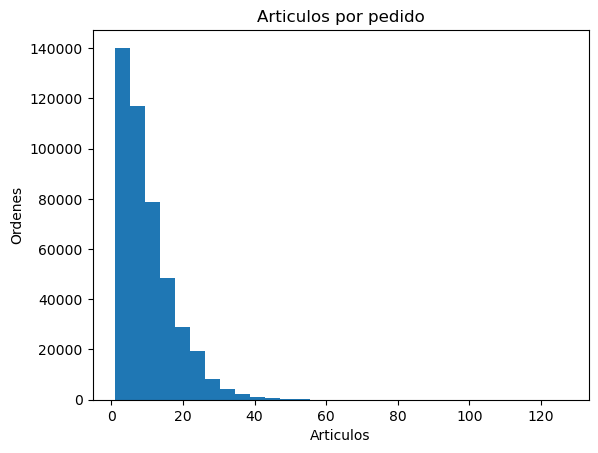

In [132]:
articulos_por_pedido.plot(kind='hist',bins=30,title='Articulos por pedido',xlabel='Articulos',ylabel='Ordenes')

Escribe aquí tus conclusiones Los pedidos no pasan de los 60 articulos y la tendencia es a comprar de 1 a 10 articulos por pedido. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [137]:
mejores_articulos_reordenados=df_order_products[df_order_products['reordered'] == 1].groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False)

In [138]:
mejores_articulos_reordenados

product_id  product_name                                 
24852       Banana                                           55763
13176       Bag of Organic Bananas                           44450
21137       Organic Strawberries                             28639
21903       Organic Baby Spinach                             26233
47209       Organic Hass Avocado                             23629
                                                             ...  
7092        Melatonin NutraSpray Sublingual Orange Flavor        1
21003       White Chocolate Macadamia Coffee Creamer             1
32856       Crab Rangoon                                         1
42727       Chocolate Lovers Chips Deluxe Cookies                1
24091       Garlic Mill Spices                                   1
Name: order_id, Length: 36228, dtype: int64

In [139]:
veinte_mejores_articulos_reordenados= mejores_articulos_reordenados.head(20)
veinte_mejores_articulos_reordenados

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: order_id, dtype: int64

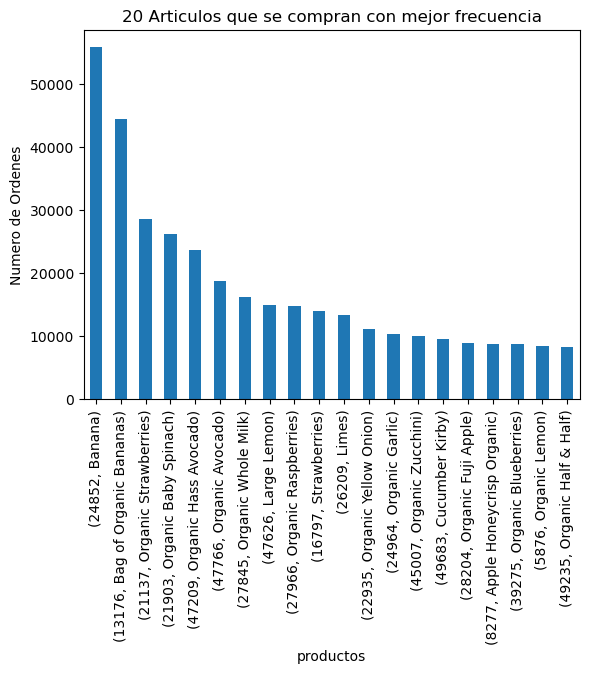

In [140]:
veinte_mejores_articulos_reordenados.plot(kind='bar',title='20 Articulos que se compran con mejor frecuencia',xlabel='productos',ylabel='Numero de Ordenes')
plt.show()

Escribe aquí tus conclusiones:Los 20 productos mas reordenados en su mayoria son los mejores productos vendidos. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [144]:
tasa_de_repeticion= df_order_products.groupby('product_id').agg({'reordered':'sum','order_id':'count'}).reset_index()

In [170]:
tasa_de_repeticion

,product_id,reordered,order_id,tasa_repeticion
0,1,158,280,0.564286
1,2,0,11,0.000000
2,3,31,42,0.738095
3,4,25,49,0.510204
4,7,1,2,0.500000
...,...,...,...,...
45568,49690,4,5,0.800000
45569,49691,31,72,0.430556
45570,49692,5,12,0.416667
45571,49693,11,25,0.440000


In [145]:
tasa_de_repeticion['tasa_repeticion']=tasa_de_repeticion['reordered']/tasa_de_repeticion['order_id']

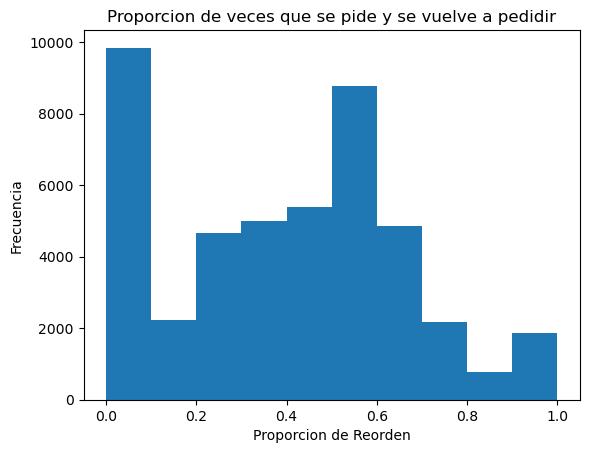

In [146]:
tasa_de_repeticion['tasa_repeticion'].plot(kind='hist',title='Proporcion de veces que se pide y se vuelve a pedidir',xlabel='Proporcion de Reorden', ylabel='Frecuencia')
plt.show()

Escribe aquí tus conclusiones en la grafica se puede visualizar que hay mas productos que no se suelen reordenar , pero hay una cantidad considerable de productos que se vuelven a ordenar. Hay productos hasta 8000 que estan en un porcentaje de 0,6 de reordenarse.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [150]:
df_order_products=df_order_products.merge(df_instacart_orders,on='order_id')
df_order_products

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1,58454,25,0,15,8.0
1,567889,1560,1,1,Bag Of Ice,37,1,129474,16,1,13,14.0
2,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...,91,16,47476,5,6,9,13.0
3,491251,8670,35,1,Diced Tomatoes,81,15,134505,27,6,13,9.0
4,2571142,1940,5,1,Organic 2% Reduced Fat Milk,84,16,155995,22,5,13,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4545002,577211,15290,12,1,Orange Bell Pepper,83,4,76414,30,2,15,13.0
4545003,1219554,21914,9,0,Peanut Butter & Jelly Fruit & Nut Food Bar,3,19,163902,19,1,1,3.0
4545004,692640,47766,4,1,Organic Avocado,24,4,597,3,0,20,30.0
4545005,319435,691,8,1,Organic Promise Strawberry Fields Cereal,121,14,7124,6,5,14,24.0


In [151]:
tasa_de_repeticion_por_cliente= df_order_products[df_order_products['reordered'] == 1].groupby(['product_id','reordered'])['user_id'].count().sort_values(ascending=False)
tasa_de_repeticion_por_cliente

product_id  reordered
24852       1            55763
13176       1            44450
21137       1            28639
21903       1            26233
47209       1            23629
                         ...  
7092        1                1
21003       1                1
32856       1                1
42727       1                1
24091       1                1
Name: user_id, Length: 36228, dtype: int64

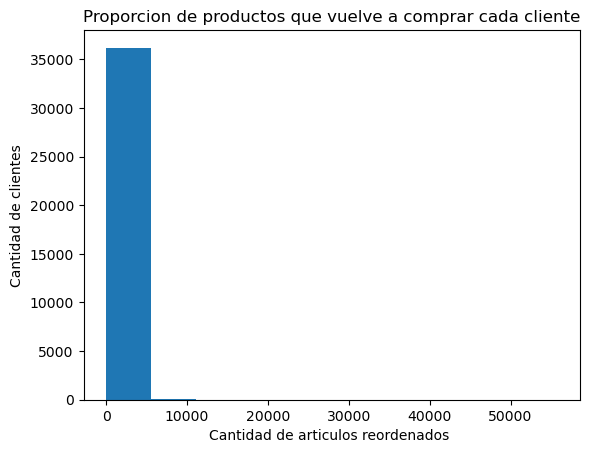

In [152]:
tasa_de_repeticion_por_cliente.plot(kind='hist',title='Proporcion de productos que vuelve a comprar cada cliente',xlabel='Cantidad de articulos reordenados ', ylabel='Cantidad de clientes')
plt.show()

Escribe aquí tus conclusiones La mayoria de clientes vuelven a reordenar articulos. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [155]:
primer_articulo_en_el_carrito= df_order_products[df_order_products['add_to_cart_order'] == 1].groupby(['product_name'])['user_id'].count().sort_values(ascending=False)
primer_articulo_en_el_carrito

product_name
Banana                                                         15562
Bag of Organic Bananas                                         11026
Organic Whole Milk                                              4363
Organic Strawberries                                            3946
Organic Hass Avocado                                            3390
                                                               ...  
Organic Quinoa Rice Pasta & White Cheddar Macaroni & Cheese        1
Organic Quinoa Squares Pineapple & Spinach                         1
Organic Radish Sprouts                                             1
Organic Rainbow Chard Blend                                        1
Chewy Chocolate Caramel                                            1
Name: user_id, Length: 26502, dtype: int64

In [156]:
veinte_primeros_articulos_en_el_carrito=primer_articulo_en_el_carrito.head(20)
veinte_primeros_articulos_en_el_carrito

product_name
Banana                         15562
Bag of Organic Bananas         11026
Organic Whole Milk              4363
Organic Strawberries            3946
Organic Hass Avocado            3390
Organic Baby Spinach            3336
Organic Avocado                 3044
Spring Water                    2336
Strawberries                    2308
Organic Raspberries             2024
Sparkling Water Grapefruit      1914
Organic Half & Half             1797
Large Lemon                     1737
Soda                            1733
Organic Reduced Fat Milk        1397
Limes                           1370
Hass Avocados                   1340
Organic Reduced Fat 2% Milk     1310
Half & Half                     1309
Organic Yellow Onion            1246
Name: user_id, dtype: int64

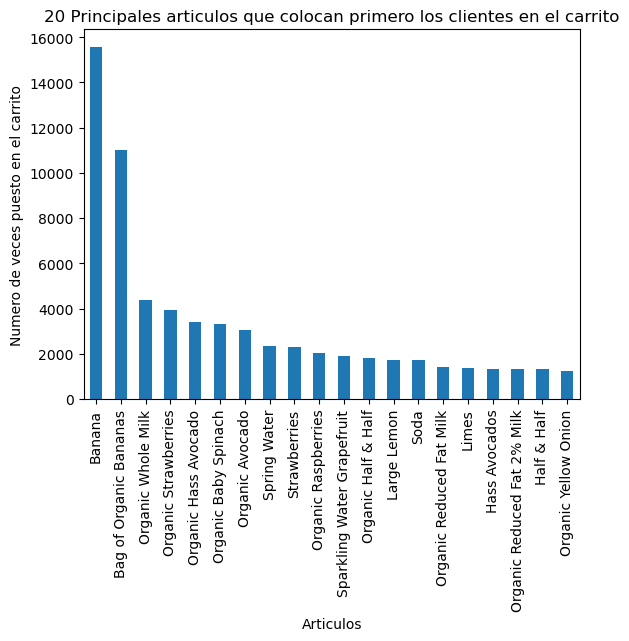

In [157]:
veinte_primeros_articulos_en_el_carrito.plot(kind='bar',title='20 Principales articulos que colocan primero los clientes en el carrito', xlabel='Articulos',ylabel='Numero de veces puesto en el carrito')
plt.show()

Conclusion: La banana sigue siendo el primero producto que los clientes colocan primero en el carrito ademas de ser el mas comprado, seguramente esta en las primeras posicion del supermercado y asi como el resto de vegetales que estan entre los 20 primeros. 

### Conclusion general del proyecto:

La tendencia de compra es mayor los fines de semana que entre semana que son dias laborables y los compradores suelen volver a comprar semanal o mensualmente eso quiere decir que estos dias se puede potenciar su compra. 

Los productos organicos y los de primera necesidad igual estan entre los mas comprados se puede potenciar su consumo. 

Se comprueba la rentabilidad de los mejores productos ya que igualmente son los mas reordenados por los compradores. 